Iteration:  0
Iteration:  1
Iteration:  2


C:\Users\crist\AppData\Local\Temp\ipykernel_5088\2403123583.py:148: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "g-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([rrt.nodApropiat.coordX, nou[0]], [rrt.nodApropiat.coordY, nou[1]], 'g-', linestyle="--")


Iteration:  3
Iteration:  4
Iteration:  5
Iteration:  6
Iteration:  7
Iteration:  8
Iteration:  9
Iteration:  10
Iteration:  11
Iteration:  12
Iteration:  13
Iteration:  14
Iteration:  15
Iteration:  16
Iteration:  17
Iteration:  18
Iteration:  19
Iteration:  20
Iteration:  21
Iteration:  22
Iteration:  23
Iteration:  24
Iteration:  25
Iteration:  26
Iteration:  27
Iteration:  28
Iteration:  29
Iteration:  30
Iteration:  31
Iteration:  32
Iteration:  33
Iteration:  34
Iteration:  35
Iteration:  36
Iteration:  37
Iteration:  38
Iteration:  39
Iteration:  40
Iteration:  41
Iteration:  42
Iteration:  43
Iteration:  44
Iteration:  45
Iteration:  46
Iteration:  47
Iteration:  48
Iteration:  49
Iteration:  50
Iteration:  51
Iteration:  52
Iteration:  53
Iteration:  54
Iteration:  55
Iteration:  56
Iteration:  57
Iteration:  58
Iteration:  59
Iteration:  60
Iteration:  61
Iteration:  62
Iteration:  63
Iteration:  64
Iteration:  65
Iteration:  66
Iteration:  67
Iteration:  68
Iteration:  69
It

C:\Users\crist\AppData\Local\Temp\ipykernel_5088\2403123583.py:167: UserWarning: linestyle is redundantly defined by the 'linestyle' keyword argument and the fmt string "r-" (-> linestyle='-'). The keyword argument will take precedence.
  ax.plot([rrt.puncteTraseu[i][0], rrt.puncteTraseu[i+1][0]],


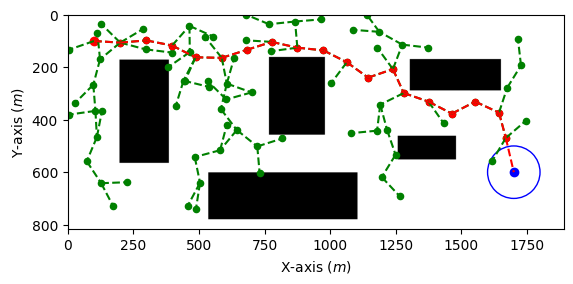

In [19]:
import numpy as np
import matplotlib.pyplot as plt
import random
from PIL import ImageOps
from PIL import Image
#Settings of Python plots

# img = Image.open('map1.png')
# img = ImageOps.grayscale(img)

# np_img = np.array(img)

# np_img = ~np_img

# np_img[np_img > 0] = 1
# plt.set_cmap('binary')
# plt.imshow(np_img)

# np.save('map1.npy', np_img)



class NodArbore():
    """Class representing a node in the tree for the RRT algorithm."""
    def __init__(self, coordX, coordY):
        self.coordX = coordX
        self.coordY = coordY
        self.copii = []
        self.parinte = None

class RRTAlgorithm():
    """Class representing the Rapidly-exploring Random Tree (RRT) algorithm."""
    def __init__(self, start, scop, numarIteratii, harta, lungimePas):
        self.arbore = NodArbore(start[0], start[1])
        self.scop = NodArbore(scop[0], scop[1])
        self.nodApropiat = None
        self.iteratii = min(numarIteratii, 200)
        self.harta = harta
        self.rho = lungimePas
        self.distantaTotala = 0
        self.distantaApropiere = np.inf
        self.numarPuncteTraseu = 0
        self.puncteTraseu = []

    def adaugaCopil(self, coordX, coordY):
        """Adds a child node at the given coordinates."""
        tempNode = NodArbore(coordX, coordY)
        self.nodApropiat.copii.append(tempNode)
        tempNode.parinte = self.nodApropiat
        if coordX == self.scop.coordX:
            self.scop.parinte = self.nodApropiat

    def punctModel(self):
        """Generate a random point within the map bounds."""
        x, y = random.randint(1, self.harta.shape[1]), random.randint(1, self.harta.shape[0])
        return np.array([x, y])

    def punctTinta(self, start, stop):
        """Calculates target point using the step size."""
        vector = self.vectorUnitar(start, stop)
        target = np.array([start.coordX + vector[0] * self.rho, start.coordY + vector[1] * self.rho])
        return np.clip(target, [0, 0], [self.harta.shape[1] - 1, self.harta.shape[0] - 1])

    def esteInObstacol(self, start, stop):
        """Check if the path between two points intersects an obstacle."""
        vector = self.vectorUnitar(start, stop)
        for i in range(self.rho):
            punct = np.array([start.coordX + i * vector[0], start.coordY + i * vector[1]])
            if self.harta[int(round(punct[1])), int(round(punct[0]))] == 1:
                return True
        return False

    def vectorUnitar(self, start, stop):
        """Returns a unit vector from start to stop."""
        vector = np.array([stop[0] - start.coordX, stop[1] - start.coordY])
        return vector / np.linalg.norm(vector)

    def nodCelMaiApropiat(self, radacina, punct):
        """Finds the nearest node in the tree to a given point."""
        if radacina is None:
            return
        dist = self.distantaEuclidiana(radacina, punct)
        if dist < self.distantaApropiere:
            self.nodApropiat = radacina
            self.distantaApropiere = dist
        for child in radacina.copii:
            self.nodCelMaiApropiat(child, punct)

    def distantaEuclidiana(self, node1, punct):
        """Calculate Euclidean distance between a node and a point."""
        return np.sqrt((node1.coordX - punct[0])**2 + (node1.coordY - punct[1])**2)

    def scopGasit(self, punct):
        """Check if the goal is reached within the threshold."""
        return self.distantaEuclidiana(self.scop, punct) <= self.rho

    def resetareValoriApropiate(self):
        """Reset the search for nearest node."""
        self.nodApropiat = None
        self.distantaApropiere = np.inf

    def reconstruireDrumRRT(self, scop):
        """Reconstruct the path from the goal to the root."""
        if scop.parinte is not None:
            self.numarPuncteTraseu += 1
            self.puncteTraseu.insert(0, np.array([scop.coordX, scop.coordY]))
            self.distantaTotala += self.rho
            self.reconstruireDrumRRT(scop.parinte)


harta = np.load('map3.npy')
start = np.array([100.0, 100.0])
# map1
# scop = np.array([1500.0, 500.0])
# map2
# scop = np.array([700.0, 250.0])
# map3
scop = np.array([1700.0, 600.0])

numarIteratii = 200
lungimePas = 100
plt.ion()  
fig, ax = plt.subplots()  
ax.imshow(harta, cmap='binary')
ax.plot(start[0], start[1], 'ro')
ax.plot(scop[0], scop[1], 'bo')
zonaScop = plt.Circle((scop[0], scop[1]), lungimePas, color='b', fill = False)
ax.add_patch(zonaScop)
ax.set_xlabel('X-axis $(m)$')
ax.set_ylabel('Y-axis $(m)$')



rrt = RRTAlgorithm(start, scop, numarIteratii, harta, lungimePas)

for i in range (rrt.iteratii):
    #Reset nearest values
    rrt.resetareValoriApropiate()
    print("Iteration: ",i)
    #algorithm begins here
    punct = rrt.punctModel()
    rrt.nodCelMaiApropiat(rrt.arbore, punct)
    nou = rrt.punctTinta(rrt.nodApropiat, punct)
    bool = rrt.esteInObstacol(rrt.nodApropiat, nou)

    if (bool == False):
        rrt.adaugaCopil(nou[0], nou[1])
        ax.plot([rrt.nodApropiat.coordX, nou[0]], [rrt.nodApropiat.coordY, nou[1]], 'g-', linestyle="--")
        ax.scatter(nou[0], nou[1], c='green', s=20) 

        fig.canvas.draw()
        fig.canvas.flush_events()
        #if scop found, append to path
        if (rrt.scopGasit(nou)):
            rrt.adaugaCopil(scop[0],scop[1])
            print("scop gasit!")
            break

#trace back the path returned, and add start to puncteTraseu
rrt.reconstruireDrumRRT(rrt.scop)
rrt.puncteTraseu.insert(0, start)
print("Numar puncteTraseu:", rrt.numarPuncteTraseu)
print("Distanta totala traseu (m): ", rrt.distantaTotala)
print("puncteTraseu: ", rrt.puncteTraseu)

for i in range(len(rrt.puncteTraseu)-1):
    ax.plot([rrt.puncteTraseu[i][0], rrt.puncteTraseu[i+1][0]],
            [rrt.puncteTraseu[i][1], rrt.puncteTraseu[i+1][1]], 'r-', linestyle="--")
    ax.scatter(rrt.puncteTraseu[i][0], rrt.puncteTraseu[i][1], c='red', s=20)
ax.scatter(rrt.puncteTraseu[-1][0], rrt.puncteTraseu[-1][1], c='red', s=20)
plt.ioff()
plt.show()
